In [ ]:
from genalg import GenAlg
import numpy as np

In [9]:
n_ciudades = 15
ciudades = np.random.rand(n_ciudades, 2) * 100

def evaluacion_viajero(individuo):
    ruta = individuo['ruta'].flatten().astype(int)
    distancia_total = 0
    
    for i in range(len(ruta)):
        ciudad_actual = ciudades[ruta[i]]
        siguiente_ciudad = ciudades[ruta[(i + 1) % len(ruta)]]
        
        distancia_total += np.linalg.norm(ciudad_actual - siguiente_ciudad)
        
    return distancia_total


params_dict = {
    'ruta': {
        'dominio': set(range(n_ciudades)), 
        'shape': (n_ciudades,)
    }
}

In [10]:
ag = GenAlg(
    n_pob=1000, 
    ratio_selec=0.5, 
    ratio_cruz=0.3, 
    ratio_mutac=0.1, 
    ratio_new=0.1, 
    p_mutac=0.5, 
    itera=2000, 
    early_stop=False
)

# Entrenar
ag.fit(
    f_eval=evaluacion_viajero, 
    params_dict=params_dict, 
    maxim=False,
    verb=True
)
mejor_distancia = ag.get_score()
mejor_ruta_dict = ag.get_params()
print("\n--- Resultado Final ---")
print(f"Mejor distancia encontrada: {mejor_distancia:.2f}")
print(f"Orden de la ruta: {mejor_ruta_dict['ruta'].flatten()}")

El score óptimo alcanzado en la iteración 1 fué de 569.09.
El score óptimo alcanzado en la iteración 101 fué de 337.26.
El score óptimo alcanzado en la iteración 201 fué de 337.26.
El score óptimo alcanzado en la iteración 301 fué de 337.26.
El score óptimo alcanzado en la iteración 401 fué de 337.26.
El score óptimo alcanzado en la iteración 501 fué de 337.26.
El score óptimo alcanzado en la iteración 601 fué de 337.26.
El score óptimo alcanzado en la iteración 701 fué de 337.26.
El score óptimo alcanzado en la iteración 801 fué de 337.26.
El score óptimo alcanzado en la iteración 901 fué de 337.26.
El score óptimo alcanzado en la iteración 1001 fué de 337.26.
El score óptimo alcanzado en la iteración 1101 fué de 337.26.
El score óptimo alcanzado en la iteración 1201 fué de 337.26.
El score óptimo alcanzado en la iteración 1301 fué de 337.26.
El score óptimo alcanzado en la iteración 1401 fué de 337.26.
El score óptimo alcanzado en la iteración 1501 fué de 337.26.
El score óptimo alca

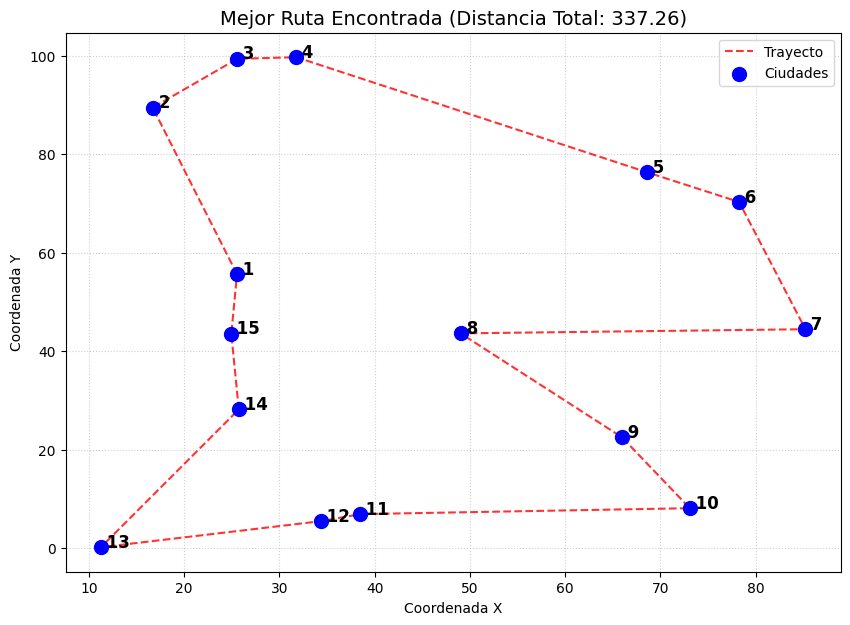

In [ ]:
import matplotlib.pyplot as plt

def graficar_ruta(ciudades, mejor_ruta_dict, mejor_distancia):
    
    ruta = mejor_ruta_dict['ruta'].flatten().astype(int)
    
   
    orden_ciudades = ciudades[ruta]
    
    
    ruta_cerrada = np.vstack([orden_ciudades, orden_ciudades[0]])
    
    plt.figure(figsize=(10, 7))
    
    
    plt.plot(ruta_cerrada[:, 0], ruta_cerrada[:, 1], 'r--', alpha=0.8, label='Trayecto')
    
    
    plt.scatter(ciudades[:, 0], ciudades[:, 1], c='blue', s=100, zorder=5, label='Ciudades')
    
    
    for i, idx in enumerate(ruta):
        plt.annotate(f" {i+1}", (ciudades[idx, 0], ciudades[idx, 1]), fontsize=12, fontweight='bold')

    plt.title(f"Mejor Ruta Encontrada (Distancia Total: {mejor_distancia:.2f})", fontsize=14)
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()


graficar_ruta(ciudades, mejor_ruta_dict, mejor_distancia)